In [57]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
#Import data
data = pd.read_csv("/content/social_data.xlsx - Data.csv")
print(data.columns)
print("\n ")
data.head(5)

Index(['Published Date', 'Account', 'Account Type', 'Campaign Name',
       'Total Impressions', 'Total Engagements', 'Media Type'],
      dtype='object')

 


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


**Identify if there are any missing values in the data?**

<Axes: title={'center': 'Missing values in the dataset'}>

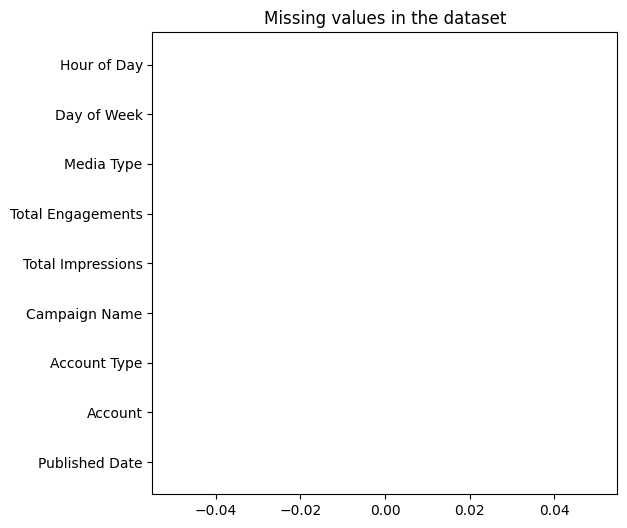

In [56]:
missing_values = data.isna().sum()
plt.figure(figsize = (6, 6)) 
missing_values.plot(kind='barh', title='Missing values in the dataset', width = 0.8, color = ['green'])

**Inference -** From the plot above, it's clear that there are no missing values for us to handle.

**Categorical Variables**

In [38]:
data['Account'].unique()

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

Text(0.5, 1.0, 'Distribution of Accounts')

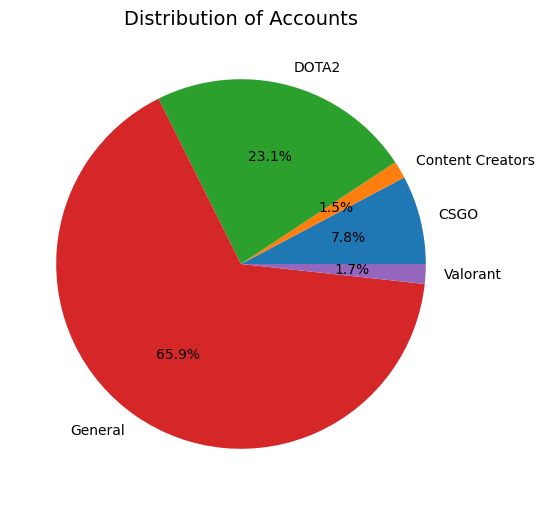

In [62]:
#Notice 'General ' and 'General' they're the same category with a typo. So replace, 'General ' with 'General'
data.loc[data['Account'] == 'General ', 'Account'] = 'General'

plt.figure(figsize=(6, 6))
sums =data['Account'].groupby(data['Account']).count()
plt.pie(sums, labels=sums.index, autopct='%1.1f%%');
plt.title('Distribution of Accounts', fontsize=14)

**Inference**

1. We have three accounts that are gaming-related: CSGO (7.8%) , Valorant (1.7%) and DOTA2 (23.1%) -- **32.6%**
2. Content Creators - 1.5%
3. General Accounts - 65.9%

In [42]:
data['Account Type'].unique()

array(['TWITTER', 'FBPAGE', 'INSTAGRAM', 'TIKTOK_BUSINESS', 'YOUTUBE',
       'LINKEDIN_COMPANY'], dtype=object)

Text(0.5, 1.0, 'Distribution of Account types')

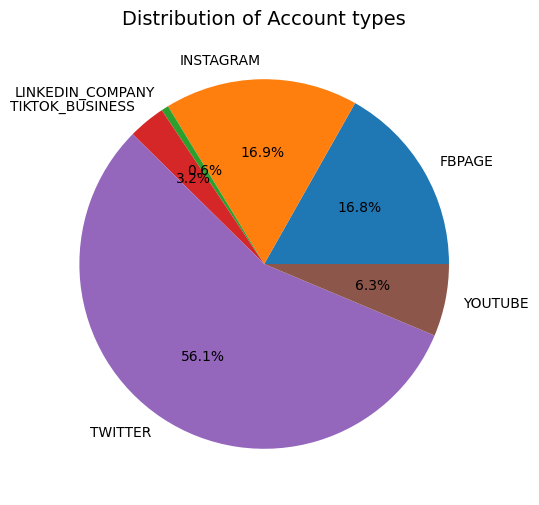

In [43]:
plt.figure(figsize=(6, 6))
sums =data['Account Type'].groupby(data['Account Type']).count()
plt.pie(sums, labels=sums.index, autopct='%1.1f%%');
plt.title('Distribution of Account types', fontsize=14)

**Inference**

1. We have two business accounts: Tiktok (3.2%) and LinkedIn (0.6%) -- **3.8%**
2. Instagram - 16.9%
3. FBPage - 16.8%
4. Youtube - 6.3%
5. Twitter - 56.1% (Majority posts have been on Twitter)

In [44]:
data['Campaign Name'].unique()

array(['N/A ', 'Community Engagement ', 'Evergreen ', 'Evil Exhibited '],
      dtype=object)

Text(0.5, 1.0, 'Distribution of Campaign Name')

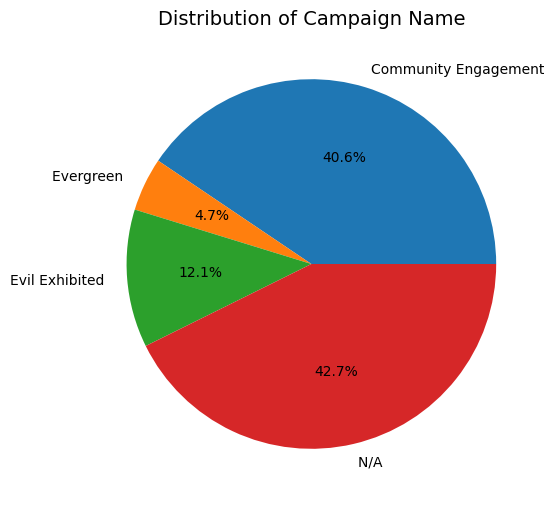

In [45]:
plt.figure(figsize=(6, 6))
sums =data['Campaign Name'].groupby(data['Campaign Name']).count()
plt.pie(sums, labels=sums.index, autopct='%1.1f%%');
plt.title('Distribution of Campaign Name', fontsize=14)

**Inference**

1. Evergreen is the least campaign name involved in these accounts (4.7%)
2. Whereas most accounts that posted were not involved in any campaign

In [46]:
data['Media Type'].unique()

array(['Text', 'Video', 'Photo', 'Link', 'Carousel', 'Mixed', 'Album'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of Media types')

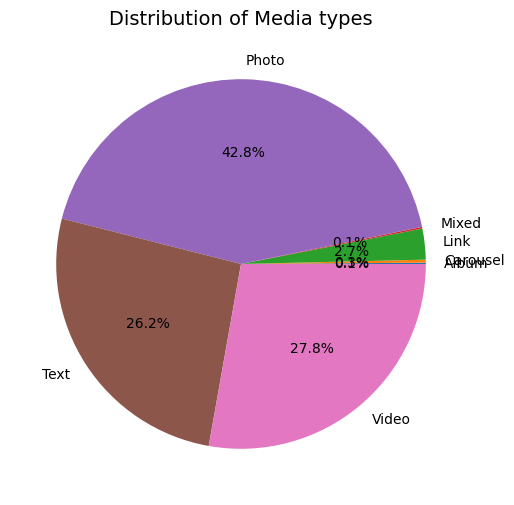

In [47]:
plt.figure(figsize=(6, 6))
sums =data['Media Type'].groupby(data['Media Type']).count()
plt.pie(sums, labels=sums.index, autopct='%1.1f%%');
plt.title('Distribution of Media types', fontsize=14)

**Inference**

1. Mixed and Album are the least media types used (0.1%) each
2. Carousel (0.3%) and Link (2.7%) 
3. Majority posts were photos constituing 42.8% of the posts

Text(0, 0.5, 'Count')

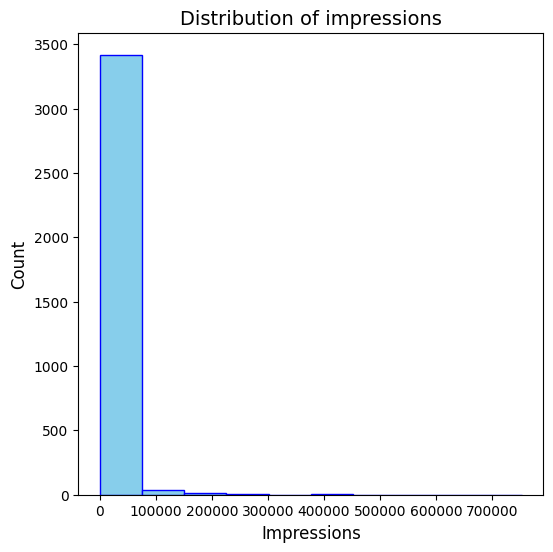

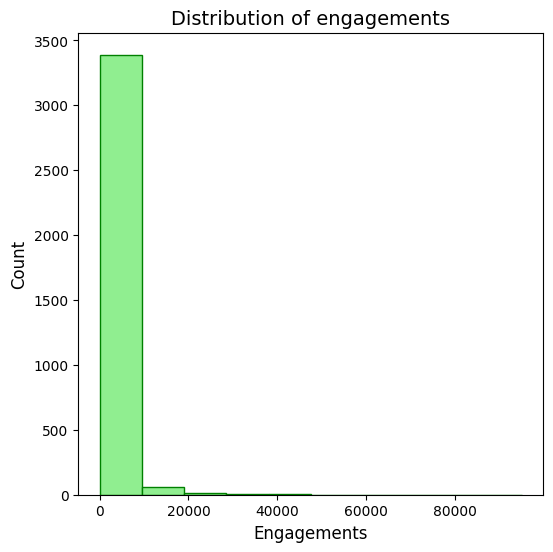

In [48]:
plt.figure(figsize = (6,6))
plt.hist(data['Total Impressions'], bins=10, color='skyblue', ec="blue" )
plt.title('Distribution of impressions', fontsize=14)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.figure(figsize = (6,6))
plt.hist(data['Total Engagements'], bins=10, color='lightgreen', ec="green" )
plt.title('Distribution of engagements', fontsize=14)
plt.xlabel('Engagements', fontsize=12)
plt.ylabel('Count', fontsize=12)

**1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?**

In [65]:
average_engagement_rate = (data['Total Engagements']/data['Total Impressions']).mean() * 100
likelihood_15_percent = len(data[data['Total Engagements'] / data['Total Impressions'] >= 0.15]) / len(data) * 100

print(f"The typical engagement rate is {average_engagement_rate:.2f}%")
print(f"The likelihood of achieving a 15% engagement rate is {likelihood_15_percent:.2f}%")

The typical engagement rate is 40.49%
The likelihood of achieving a 15% engagement rate is 6.50%


**2. Does the day of the week and time of posting affect engagement rates?**

In [66]:
data['Published Date'] = pd.to_datetime(data['Published Date'])

data['Day of Week'] = data['Published Date'].dt.day_name()
data['Hour of Day'] = data['Published Date'].dt.hour

In [69]:
# Calculate the average engagement rate by grouping based on the day of the week and hour
engagement_rates = data.groupby(['Day of Week', 'Hour of Day'])['Total Engagements', 'Total Impressions'].sum()
engagement_rates['Engagement Rate'] = (engagement_rates['Total Engagements'] / engagement_rates['Total Impressions']) * 100


<ipython-input-69-778f8dc2d4d8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_rates = data.groupby(['Day of Week', 'Hour of Day'])['Total Engagements', 'Total Impressions'].sum()


In [ ]:
# Sort the engagement rates in descending order
sorted_engagement_rates = engagement_rates.sort_values(by='Engagement Rate', ascending=False)

# Get the top performing days of the week and posting times
top_days = sorted_engagement_rates.groupby('Day of Week').first()
top_times = sorted_engagement_rates.groupby('Hour of Day').first()

Top Performing Days of the Week:
             Engagement Rate
Day of Week                 
Friday             16.910347
Monday             12.031835
Saturday           12.666653
Sunday             29.907588
Thursday           21.649485
Tuesday            51.787481
Wednesday          21.484029


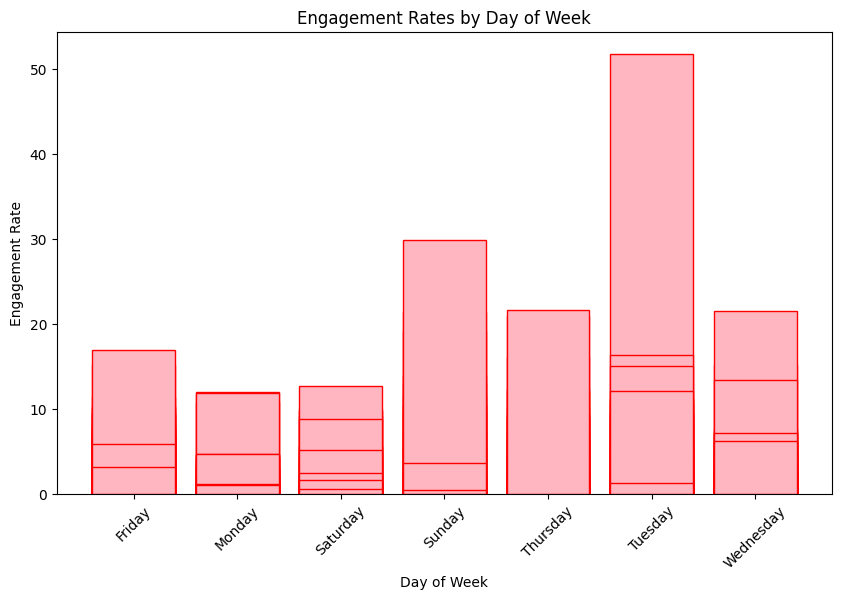

In [82]:
# Display the top performing days of the week
print("Top Performing Days of the Week:")
print(top_days[['Engagement Rate']])

# Create a bar chart for engagement rates by day of the week
plt.figure(figsize=(10, 6))
plt.bar(engagement_rates.index.get_level_values('Day of Week'), engagement_rates['Engagement Rate'], color='lightpink', ec="red")
plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rates by Day of Week')
plt.xticks(rotation=45)
plt.show()


Top Performing Posting Times:
             Engagement Rate
Hour of Day                 
0                        NaN
2                   0.840156
3                   9.984562
4                  15.184610
5                  51.787481
6                  11.621161
7                  21.484029
8                  21.355317
9                  12.666653
10                 12.031835
11                 12.299457
12                 13.994257
13                 11.899265
14                 13.425951
15                 10.430031
16                 16.316833
17                 19.220725
18                 16.910347
19                  7.220359
20                 29.907588
21                 21.649485
22                  3.112155
23                  6.253230


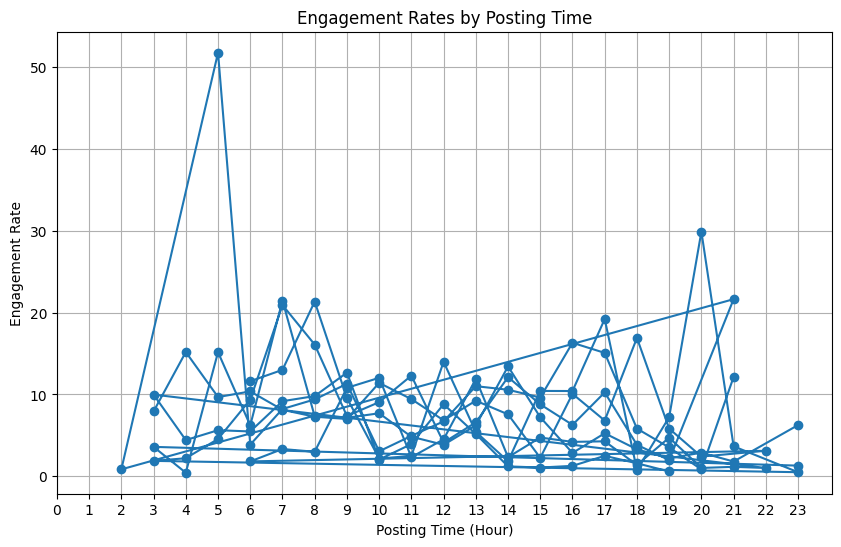

In [78]:
# Display the top performing posting times
print("\nTop Performing Posting Times:")
print(top_times[['Engagement Rate']])

# Create a line chart for engagement rates by posting time
plt.figure(figsize=(10, 6))
plt.plot(engagement_rates.index.get_level_values('Hour of Day'), engagement_rates['Engagement Rate'], marker='o')
plt.xlabel('Posting Time (Hour)')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rates by Posting Time')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Inference**

From the plots above it is clear that; 
1. Posts on `Tuesday at 5:00am` seems to have a *higher* engagement rate
2. Posts around `Monday at 2:00am` have the *least* engagement rate

**3. How are our game titles doing in terms of social performance? Is there a specific game
we should focus more on or less?**

Social Performance by Game Title:
          Total Impressions  Total Engagements  Engagement Rate
Account                                                        
CSGO                2313918              92336         3.990461
DOTA2               1859326             123990         6.668545
Valorant              22979                931         4.051525


<Axes: title={'center': 'Total Impressions for gaming accounts'}, ylabel='Account'>

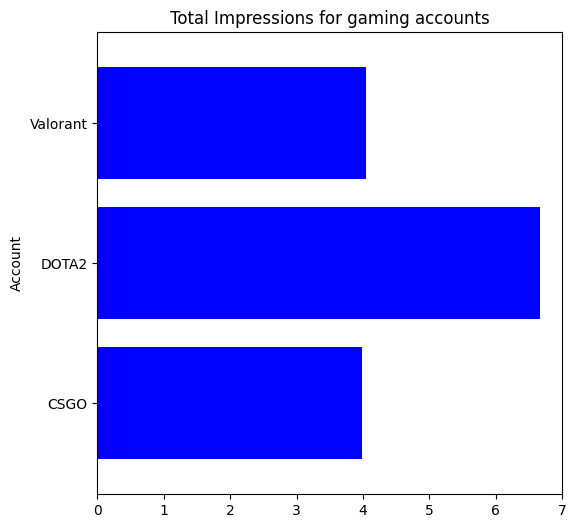

In [100]:
# Filter the data for the specific game titles (CSGO, DOTA2, and Valorant)
game_data = data[data['Account'].isin(['CSGO', 'DOTA2', 'Valorant'])]

# Group the data by game title and calculate the total impressions and total engagements
performance = game_data.groupby('Account').agg({'Total Impressions': 'sum', 'Total Engagements': 'sum'})

performance['Engagement Rate'] = (performance['Total Engagements'] / performance['Total Impressions']) * 100


# Display the performance of each game title
print("Social Performance by Game Title:")
print(performance)

plt.figure(figsize = (6, 6)) 
performance['Engagement Rate'].plot(kind='barh', title='Total Impressions for gaming accounts', width = 0.8, color = ['blue'])

#plt.figure(figsize = (6, 6)) 
#performance['Total Impressions'].plot(kind='barh', title='Total Impressions for gaming accounts', width = 0.8, color = ['blue'])

#plt.figure(figsize = (6, 6)) 
#performance['Total Engagements'].plot(kind='barh', title='Total Engagements for gaming accounts', width = 0.8, color = ['purple'])

**Inference**

1. After filtering to gaming-related accounts we work on CSGO, DOTA2 and Valorant
2. Clearly, DOTA2 has the highest engagement rate and can use more focus to improve further
3. CSGO on the other hand, has the least engagement rate

**4. What media type performs the best?**

            Total Impressions  Total Engagements  Engagement Rate
Media Type                                                       
Album                      20                  8        40.000000
Photo                23893992            2167739         9.072318
Video                10594813             859451         8.111998
Text                  3106203             246312         7.929681
Mixed                  184984              13664         7.386585
Carousel               160689               6541         4.070596
Link                   232465               2257         0.970899


<ipython-input-114-2c81f2a09eb8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media_performance = data.groupby('Media Type')['Total Impressions', 'Total Engagements'].sum()


Text(0.5, 1.0, 'Engagement Rates for Media Type')

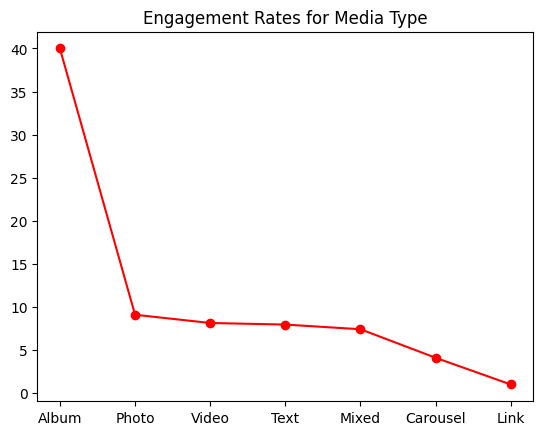

In [114]:
# Calculate the total impressions and total engagements for each media type
media_performance = data.groupby('Media Type')['Total Impressions', 'Total Engagements'].sum()

# Calculate the engagement rate for each media type
media_performance['Engagement Rate'] = (media_performance['Total Engagements'] / media_performance['Total Impressions']) * 100

# Sort the media_performance dataframe by the engagement rate in descending order
media_performance = media_performance.sort_values('Engagement Rate', ascending=False)

# Display the results
print(media_performance)

#Plot 
plt.plot(media_performance['Engagement Rate'], color='red', marker='o')
plt.title("Engagement Rates for Media Type")

#plt.figure(figsize = (6, 6)) 
#performance['Engagement Rate'].plot(kind='barh', title='Total Impressions for gaming accounts', width = 0.8, color = ['blue'])


**Inference**

1. `Album` seems to have more engagement rate but that could be because there is less data
2. `Photos` is the media type that performs best

**5. What is our best performing campaign?**

                       Total Impressions  Total Engagements  Engagement Rate
Campaign Name                                                               
N/A                              7298086            1022773        14.014263
Community Engagement            23803756            2044767         8.590102
Evergreen                        1328729              43127         3.245733
Evil Exhibited                   5742595             185305         3.226851


<ipython-input-117-63b09d4f144f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  campaign_performance = data.groupby('Campaign Name')['Total Impressions', 'Total Engagements'].sum()


Text(0.5, 1.0, 'Engagement Rates for Campaigns')

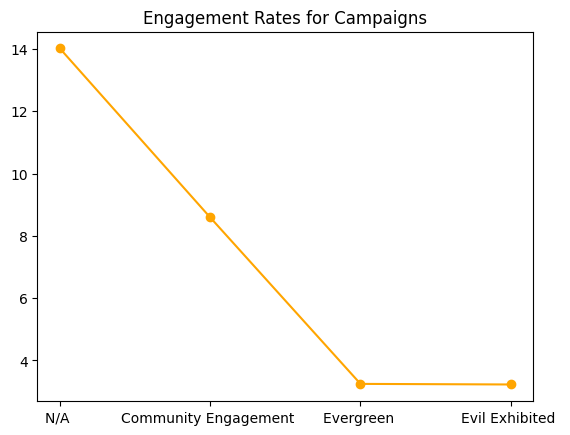

In [117]:
# Calculate the total impressions and total engagements for each campaign
campaign_performance = data.groupby('Campaign Name')['Total Impressions', 'Total Engagements'].sum()

# Calculate the engagement rate for each campaign
campaign_performance['Engagement Rate'] = (campaign_performance['Total Engagements'] / campaign_performance['Total Impressions']) * 100

# Sort the campaign_performance dataframe by the engagement rate in descending order
campaign_performance = campaign_performance.sort_values('Engagement Rate', ascending=False)

# Display the results
print(campaign_performance)

#Plot 
plt.plot(campaign_performance['Engagement Rate'], color='orange', marker='o')
plt.title("Engagement Rates for Campaigns")

**Inference**

1. `N/A` seems to have more engagement rate but that could be because there are many accounts that are not associated with any campaigns
2. However, `Community Engagement` is the best performing campaign

**6. Define out a posting strategy for our social channels based on your discoveries.**

Based on the discoveries from the data analysis, here is a proposed posting strategy for our social channels:

1. *Account Focus*:
  - Give more attention to the gaming-related accounts: CSGO, DOTA2, and Valorant, as they collectively constitute 32.6% of the total engagement.
  - Content Creators account should also be considered and provided with regular content updates, as it contributes to 1.5% of the engagement.
  - General accounts, although they have the majority share of 65.9%, can receive regular but slightly less focus compared to the gaming-related accounts.

2. *Account Type*:
  - Prioritize posts on Twitter, as it has the highest share of 56.1% among the account types. Allocate resources to create engaging content specifically tailored for Twitter users.
  - Instagram and FBPage have a significant presence with 16.9% and 16.8% shares, respectively. Maintain consistent posting and engagement strategies on these platforms.
  - Allocate resources to create content for YouTube, as it has a 6.3% share. Explore video content creation and promotion to leverage the platform's potential.
  - LinkedIn and TikTok have relatively smaller shares of 0.6% and 3.2% respectively, but they can still be utilized to reach specific target audiences. Consider creating content suitable for these platforms.
  
3. *Typical Engagement Rate*:
  - The typical engagement rate is 40.49%, indicating a good level of audience interaction and interest in our content.
  - This signifies that our audience is actively engaging with the posts, which is a positive indicator for our social performance.

4. *Posting Schedule*:
  - Based on the line graph analysis, consider focusing on posting on Tuesdays at 5:00am, as it has shown higher engagement rates.
  - Avoid posting on Mondays at 2:00am, as it has shown the least engagement rates.

5. *Gaming-Related Accounts*:
  - Focus on the gaming-related accounts, specifically CSGO, DOTA2, and Valorant (32.6%).
  - DOTA2 has the highest engagement rate and should receive more attention and resources to further enhance its performance.
  - CSGO has the least engagement rate and requires additional efforts to improve audience engagement.

6. *Media Types*:
  - Photos have shown the best performance, constituting 42.8% of the posts. Continue to prioritize photo content creation, ensuring high-quality visuals and engaging captions.
  - Mixed and Album media types have the least engagement rates. While continuing to include variety in the content, allocate fewer resources to these media types.
  - Experiment with Carousel and Link media types, as they have shown potential with 0.3% and 2.7% shares respectively. Explore creative ways to use these media types effectively.

7. *Campaigns*:
  - Focus on running campaigns, especially Community Engagement, which has shown the best performance. Allocate resources and plan campaigns that encourage active participation and interaction from the audience.
  - Although Evergreen campaign has the least involvement, consider exploring ways to leverage it by creating evergreen content that can be relevant and engaging over a longer period.

Overall, the proposed posting strategy involves focusing on the gaming-related accounts, optimizing posting times, prioritizing photo content, and running engaging campaigns. Regularly monitor the performance metrics, gather audience feedback, and adapt the strategy accordingly to maximize audience engagement and social performance.

**7. What suggestions would you give to the social media team if they want to expand their
presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?**

Based on the analysis, here are some suggestions for the social media team if they want to expand their presence:



In [126]:
filtered_data = data[['Account', 'Account Type', 'Total Engagements']]
grouped_data = filtered_data.groupby(['Account', 'Account Type']).sum().reset_index()
pivoted_data = grouped_data.pivot(index='Account', columns='Account Type', values='Total Engagements').fillna(0)
account_type_expansion = pivoted_data.idxmax(axis=1)

# Print the suggested account types for expanding presence
print("Suggestions for expanding presence:\n")
for account, account_type in account_type_expansion.items():
    print(f"- {account} should focus on {account_type}")


Suggestions for expanding presence:

- CSGO should focus on TWITTER
- Content Creators should focus on YOUTUBE
- DOTA2 should focus on TWITTER
- General should focus on FBPAGE
- Valorant should focus on YOUTUBE


1. Assess the Performance of Existing Channels:
  - Evaluate the performance of the existing social media channels, such as the CSGO YouTube channel.
  - Identify the channels that are performing well in terms of engagement, audience reach, and conversion rates.
  - This will help determine the strengths and weaknesses of each channel and guide the expansion strategy.

2. Understand the Target Audience:
  - Gain a deep understanding of the target audience for each social media channel.
  - Identify their demographics, preferences, and behaviors.
  - This will help determine which new channels are most suitable for reaching and engaging with the target audience.

3. Research New Platforms:
  - Conduct thorough research on potential new platforms, such as TikTok.
  - Evaluate the platform's user base, engagement levels, and relevance to the brand and target audience.
  - Consider factors such as the platform's content format, features, and algorithms.

4. Consider Content Compatibility:
  - Assess the compatibility of the existing content and messaging with the new platform.
  - Determine if the content created for the CSGO YouTube channel can be repurposed or adapted for TikTok or other platforms.
  - Ensure that the content aligns with the platform's unique characteristics and user expectations.

5. Develop a Channel-Specific Strategy:
  - Create a tailored strategy for each new platform based on its unique characteristics and audience preferences.
  - Define the goals, key performance indicators (KPIs), and metrics to track for each channel.
  - Develop a content plan that considers the platform's content formats, trends, and best practices.

6. Test and Iterate:
  - Start by testing the waters on the new platform with a small-scale campaign or content experiment.
  - Monitor the performance and gather insights to understand the platform's effectiveness in reaching and engaging the target audience.
  - Based on the results, iterate and refine the strategy to optimize the content and tactics for better performance.

7. Cross-Promote and Integrate Channels:
  - Leverage the existing social media channels to cross-promote the new platforms.
  - Use the established channels to create awareness and drive traffic to the new platforms.
  - Integrate the new channels into the overall social media ecosystem to create a cohesive and interconnected presence.

8. Monitor and Analyze:
  - Continuously monitor the performance of all social media channels, including the new ones.
  - Analyze the engagement rates, audience growth, conversion rates, and other relevant metrics.
  - Use the insights gained to refine the strategy, optimize content, and make data-driven decisions.